In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import joblib
import os
# from outlier_cleaner import OutlierCleaner

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data_science_salaries.csv')

In [3]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [4]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [5]:
df.shape

(6599, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6594    False
6595    False
6596    False
6597    False
6598    False
Length: 6599, dtype: bool

In [8]:
df.isnull().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

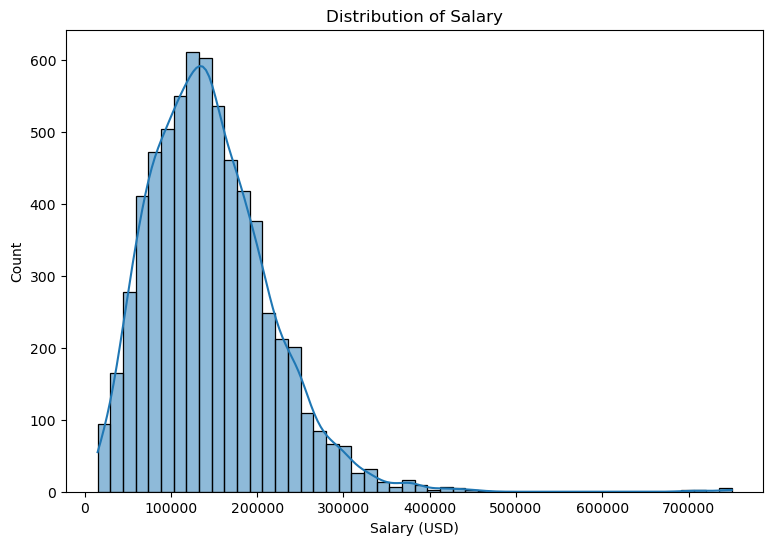

In [9]:
plt.figure(figsize=(9, 6))
sns.histplot(df["salary_in_usd"], bins=50, kde=True)
plt.title("Distribution of Salary")
plt.xlabel("Salary (USD)")
plt.show()


## EDA

In [10]:
df['salary_in_usd'].mode()

0    100000
Name: salary_in_usd, dtype: int64

In [11]:
df['salary_in_usd'].median()

138666.0

In [12]:
df['salary_in_usd'].skew()

1.3607055055089352

In [13]:
df.groupby('experience_level')['salary_in_usd'].mean()

experience_level
Entry-level         84448.916814
Executive-level    189687.346457
Mid-level          119019.812537
Senior-level       162071.063581
Name: salary_in_usd, dtype: float64

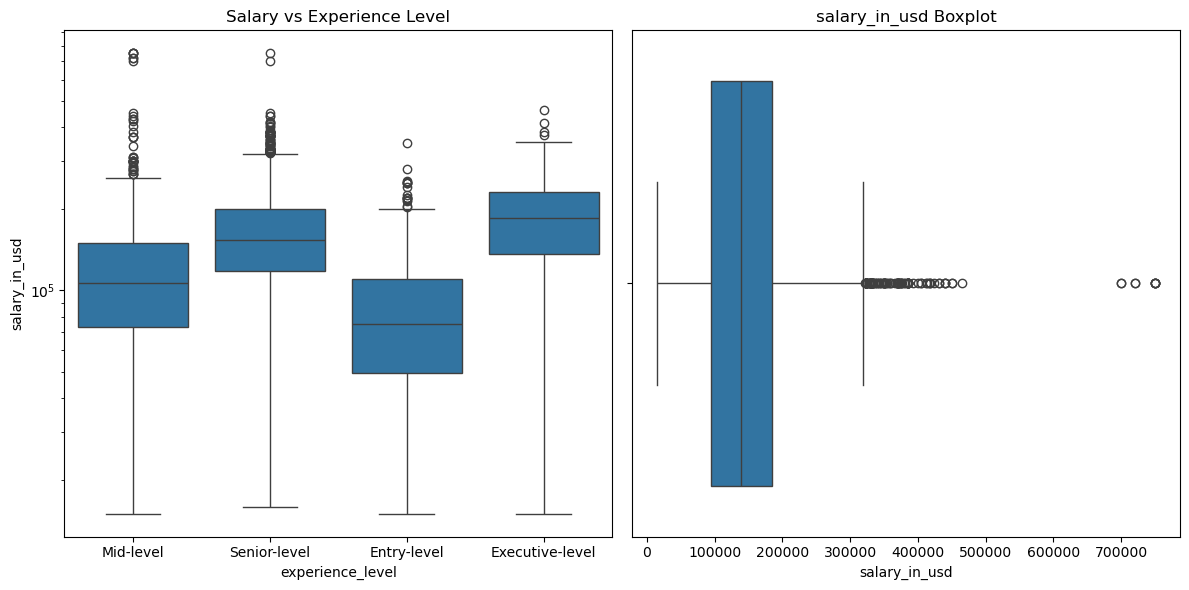

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.boxplot(
    x="experience_level",
    y="salary_in_usd",
    data=df,
)
plt.title("Salary vs Experience Level")
plt.yscale("log") 

plt.subplot(1, 2, 2)
sns.boxplot(df, x='salary_in_usd')
plt.title('salary_in_usd Boxplot')
plt.xlabel('salary_in_usd')
plt.tight_layout()
plt.show()

In [15]:
df['employment_type'].mode()

0    Full-time
Name: employment_type, dtype: object

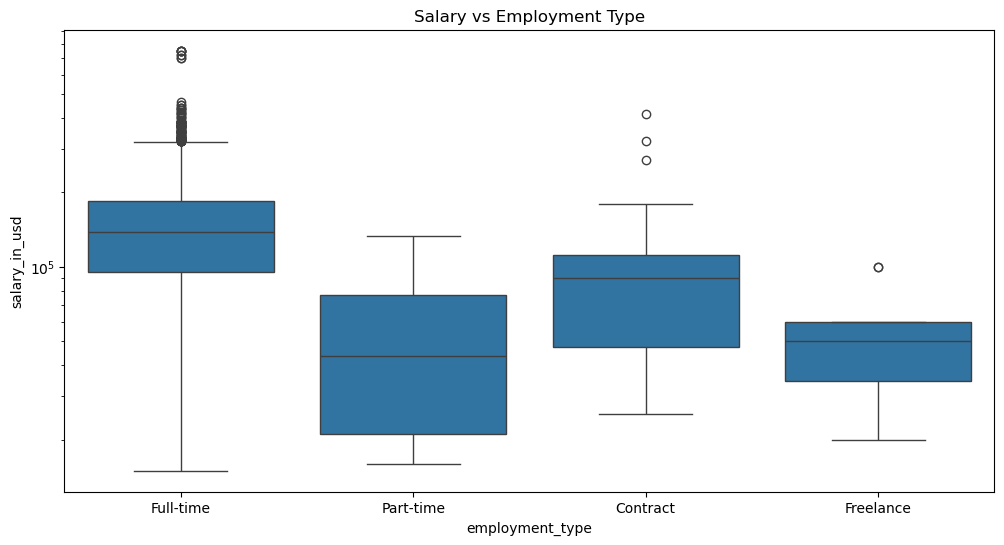

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(
    x="employment_type",
    y="salary_in_usd",
    data=df
)
plt.title("Salary vs Employment Type")
plt.yscale("log")
plt.show()


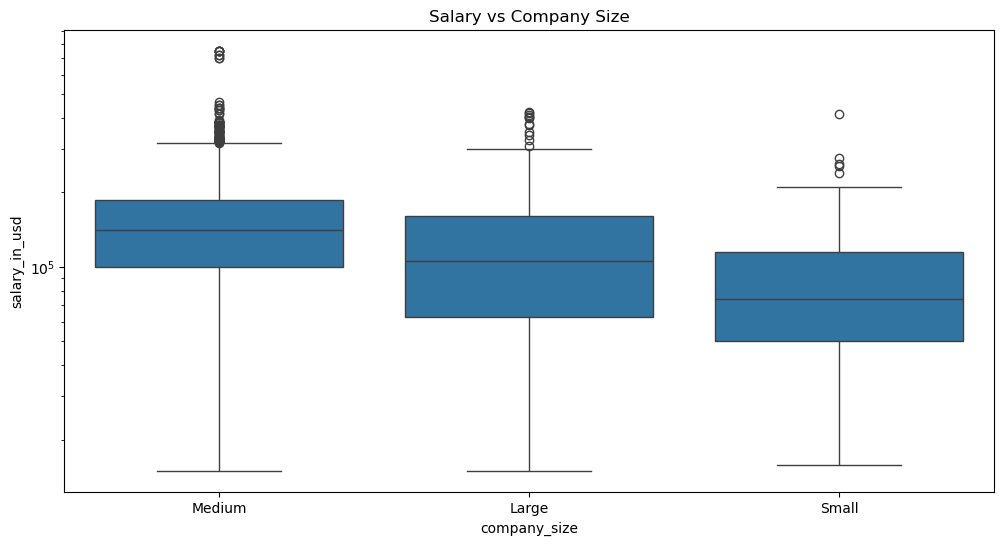

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(
    x="company_size",
    y="salary_in_usd",
    data=df
)
plt.title("Salary vs Company Size")
plt.yscale("log")
plt.show()


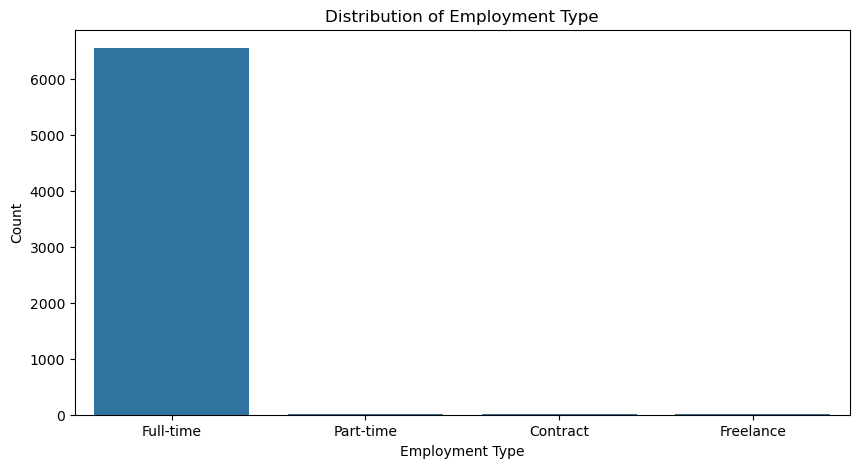

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x="employment_type", data=df)
plt.title("Distribution of Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.show()


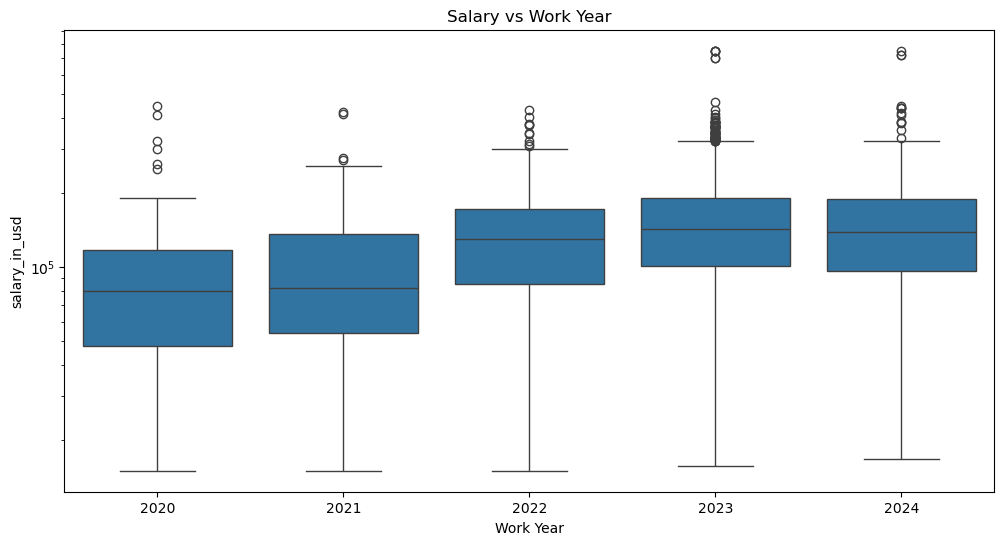

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(
    x="work_year",
    y="salary_in_usd",
    data=df
)
plt.title("Salary vs Work Year")
plt.yscale("log")
plt.xlabel("Work Year")
plt.show()


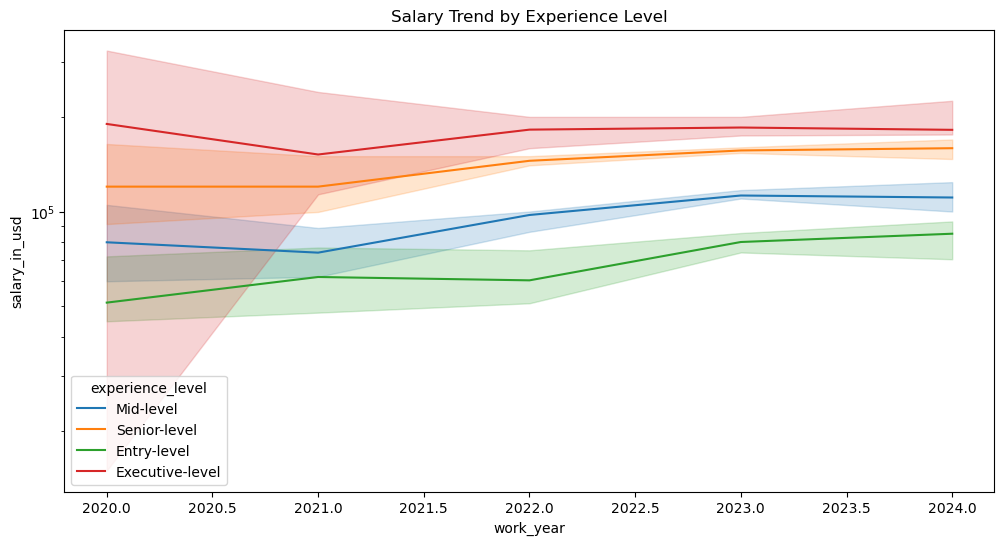

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(
    x="work_year",
    y="salary_in_usd",
    hue="experience_level",
    data=df,
    estimator="median"
)
plt.title("Salary Trend by Experience Level")
plt.yscale("log")
plt.show()


In [21]:
df['experience_level'].mode()

0    Senior-level
Name: experience_level, dtype: object

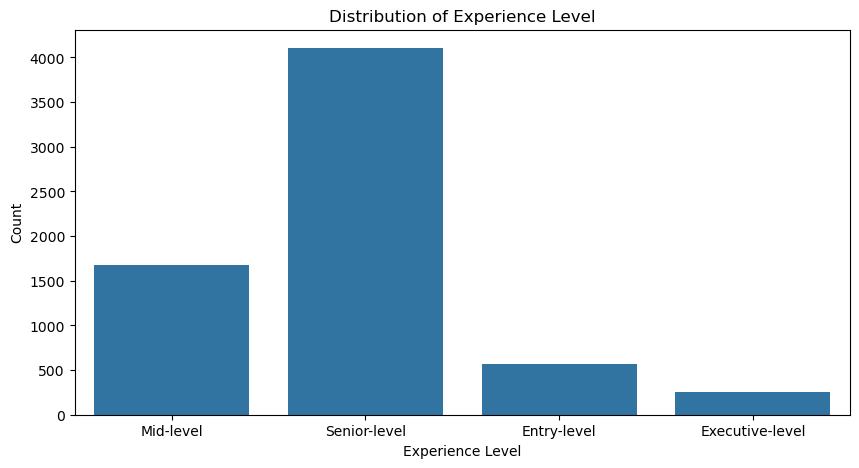

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x="experience_level", data=df)
plt.title("Distribution of Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.show()


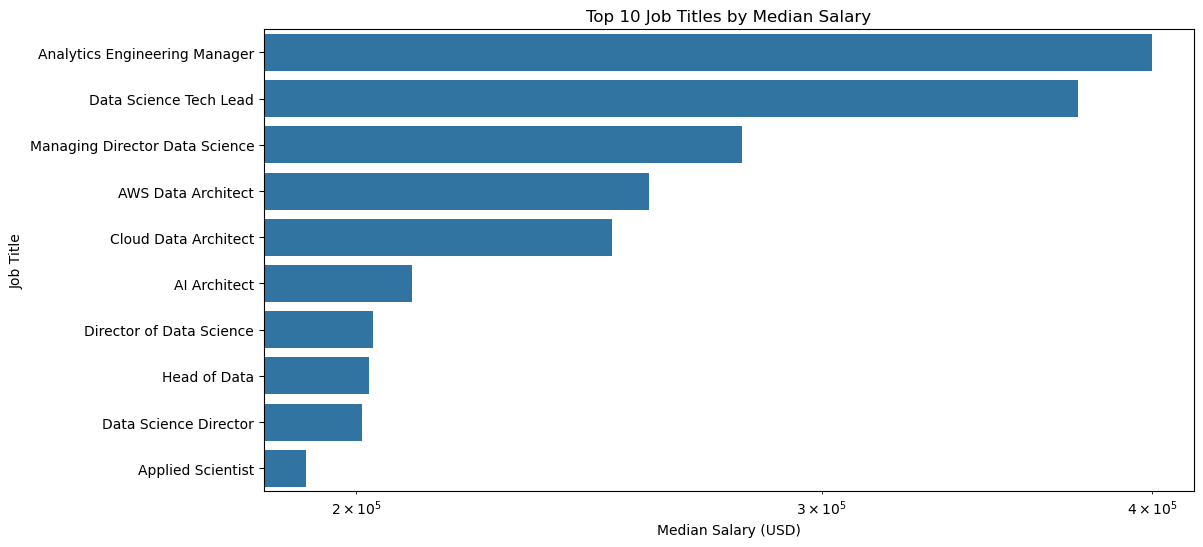

In [23]:
top_jobs = (
    df.groupby("job_title")["salary_in_usd"]
    .median()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(
    x=top_jobs.values,
    y=top_jobs.index
)
plt.title("Top 10 Job Titles by Median Salary")
plt.xscale("log")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Job Title")
plt.show()


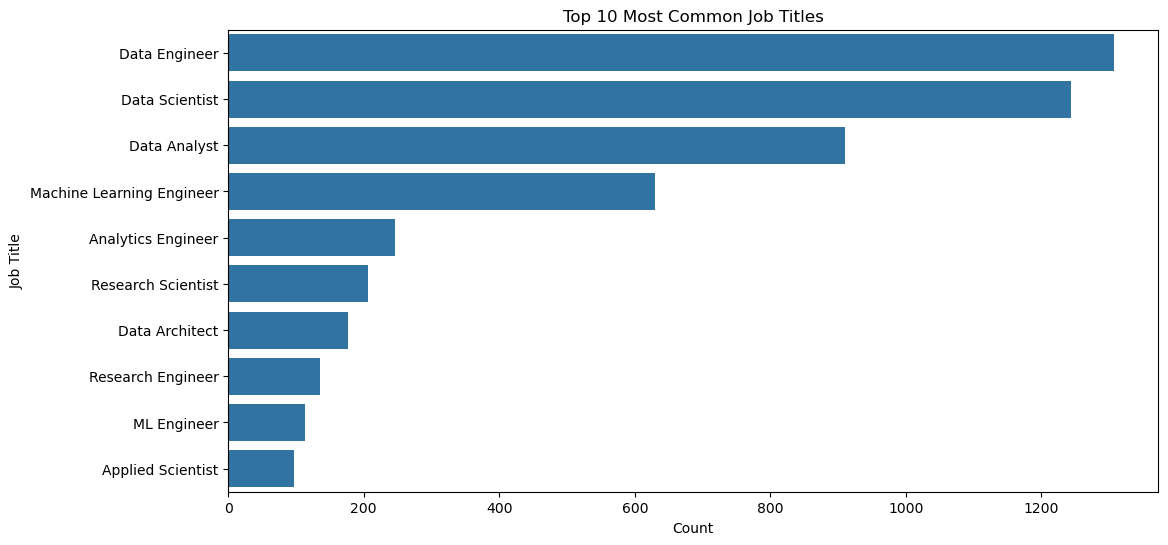

In [24]:
top_titles = df["job_title"].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x=top_titles.values,
    y=top_titles.index
)
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()


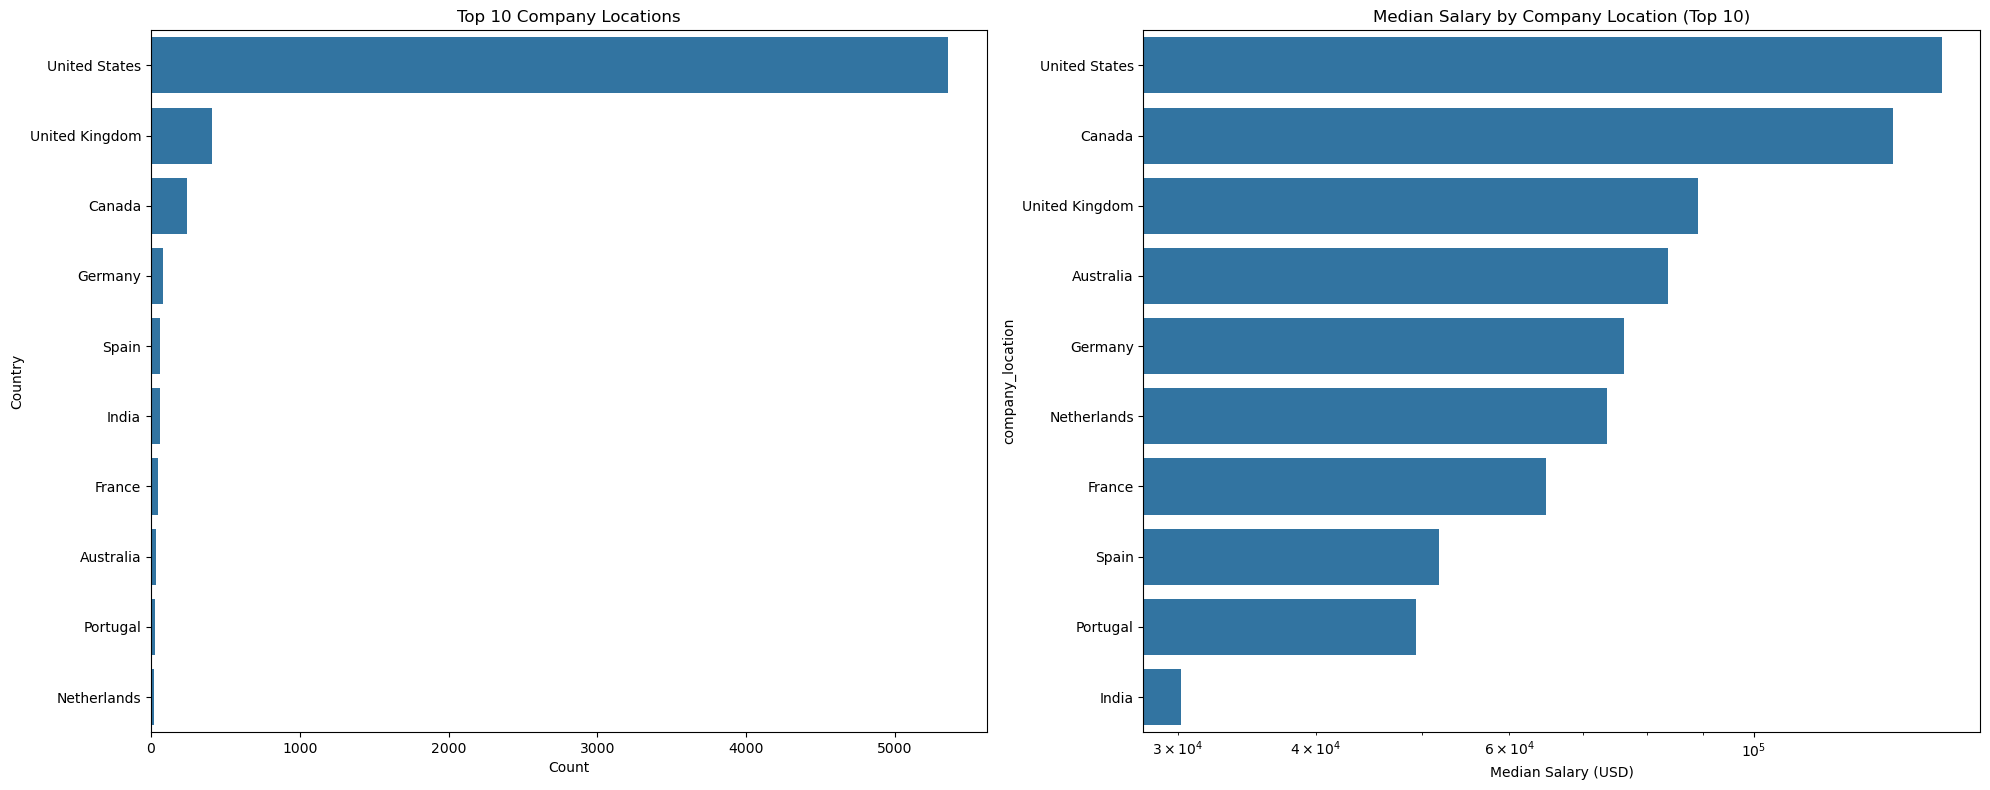

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Top 10 company locations (count)
top_countries = df["company_location"].value_counts().head(10)

sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    ax=axes[0]
)
axes[0].set_title("Top 10 Company Locations")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Country")

# Median salary by company location
top_countries_salary = (
    df[df["company_location"].isin(top_countries.index)]
    .groupby("company_location")["salary_in_usd"]
    .median()
    .sort_values(ascending=False)
)

sns.barplot(
    x=top_countries_salary.values,
    y=top_countries_salary.index,
    ax=axes[1]
)
axes[1].set_title("Median Salary by Company Location (Top 10)")
axes[1].set_xlabel("Median Salary (USD)")
axes[1].set_xscale("log")

plt.tight_layout()
plt.show()



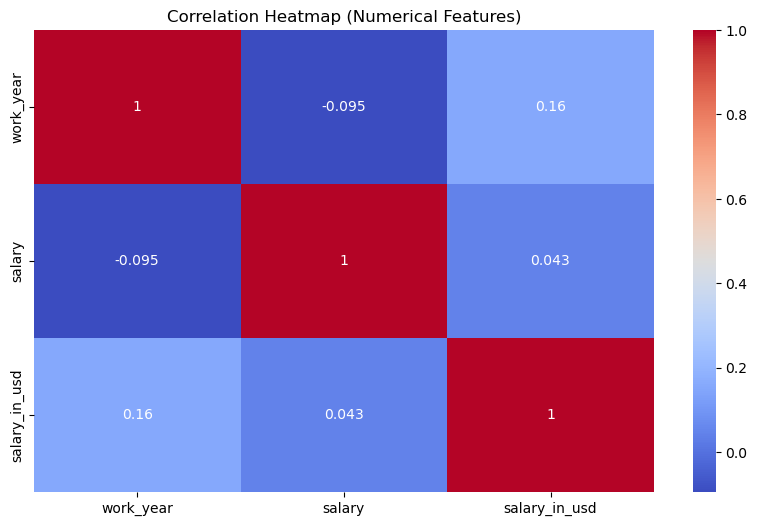

In [26]:
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


###  1.Salary distribution is highly right-skewed with several high-value outliers
###  2.Experience level shows a strong positive relationship with salary
###  3.Company size and employment type also influence salary levels
###  4.Salary has increased steadily over the years
###  5.These insights guide feature selection for predictive modeling

# Encording

In [27]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [77]:
Target = "salary_in_usd"

In [78]:
df[Target].describe()

count      6599.000000
mean     145560.558569
std       70946.838070
min       15000.000000
25%       95000.000000
50%      138666.000000
75%      185000.000000
max      750000.000000
Name: salary_in_usd, dtype: float64

In [79]:
drop_cols = ["salary", "salary_currency", Target]
X = df.drop(columns=drop_cols)
y = df[Target]

# Identify column types
num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

num_cols, cat_cols


(['work_year'],
 ['job_title',
  'experience_level',
  'employment_type',
  'work_models',
  'employee_residence',
  'company_location',
  'company_size'])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(5279, 8) (1320, 8)


In [82]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop"
)

## Machine Learning

In [83]:
def evaluate_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [84]:
linreg_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

linreg_model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [85]:
linreg_model.fit(X_train, y_train)
pred_lr = linreg_model.predict(X_test)

def evaluate_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2


mae_lr, rmse_lr, r2_lr = evaluate_regression(y_test, pred_lr)
(mae_lr, rmse_lr, r2_lr)

(44028.96029117559, 63454.57996449719, 0.31487439022955566)

In [86]:
rf_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [87]:
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

mae_rf, rmse_rf, r2_rf = evaluate_regression(y_test, pred_rf)
(mae_rf, rmse_rf, r2_rf)


(44615.852032018876, 63550.70286457611, 0.31279712043799)

In [88]:
results = pd.DataFrame([
    {"model": "Linear Regression", "MAE": mae_lr, "RMSE": rmse_lr, "R2": r2_lr},
    {"model": "Random Forest", "MAE": mae_rf, "RMSE": rmse_rf, "R2": r2_rf},
]).sort_values("RMSE")

results


,model,MAE,RMSE,R2
0,Linear Regression,44028.960291,63454.579964,0.314874
1,Random Forest,44615.852032,63550.702865,0.312797


In [89]:
ohe = rf_model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)

all_feature_names = np.concatenate([cat_feature_names, np.array(num_cols)])

importances = rf_model.named_steps["model"].feature_importances_
fi = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

fi.head(20)

employee_residence_United States        0.233263
job_title_Data Analyst                  0.099851
experience_level_Senior-level           0.084620
work_year                               0.066655
experience_level_Executive-level        0.038741
job_title_Machine Learning Engineer     0.033833
experience_level_Entry-level            0.022856
work_models_On-site                     0.022215
job_title_ML Engineer                   0.019650
job_title_Research Scientist            0.018644
experience_level_Mid-level              0.018154
work_models_Remote                      0.017077
employee_residence_Canada               0.015916
company_size_Medium                     0.015301
job_title_Machine Learning Scientist    0.015173
job_title_Research Engineer             0.014244
job_title_Data Scientist                0.011385
company_size_Large                      0.010444
job_title_Applied Scientist             0.009273
job_title_Data Specialist               0.008450
dtype: float64

# Plot top 20 feature importances

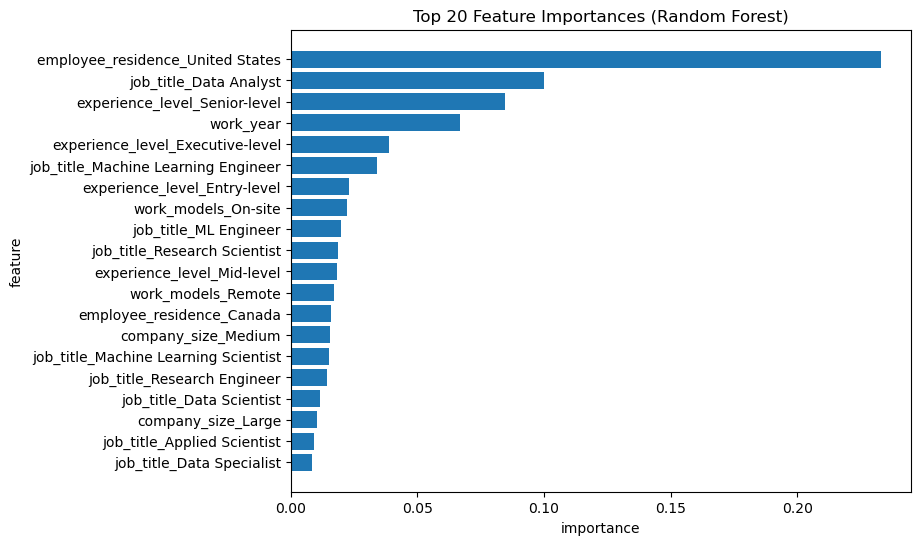

In [49]:

top20 = fi.head(20)[::-1]
plt.figure(figsize=(8,6))
plt.barh(top20.index, top20.values)
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("importance")
plt.ylabel("feature")
plt.show()

In [73]:
best_model = rf_model if rmse_rf <= rmse_lr else linreg_model
joblib.dump(best_model, "salary_model.joblib")


['salary_model.joblib']

In [74]:
type(base_model)


sklearn.linear_model._base.LinearRegression

In [75]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [76]:
import gradio as gr
import pandas as pd
import joblib
from pathlib import Path

# ===== Load model =====
model = joblib.load("salary_model.joblib")


expected_cols = list(model.feature_names_in_)


DATA_PATH = Path("data_science_salaries.csv")
df = pd.read_csv(DATA_PATH)

def unique_sorted(col):
    return sorted(df[col].dropna().astype(str).unique().tolist())

job_title_choices = unique_sorted("job_title")
experience_choices = unique_sorted("experience_level")
employment_choices = unique_sorted("employment_type")
work_models_choices = unique_sorted("work_models")
residence_choices = unique_sorted("employee_residence")
location_choices = unique_sorted("company_location")
company_size_choices = unique_sorted("company_size")

# work_year slider range from dataset
year_min = int(df["work_year"].min())
year_max = int(df["work_year"].max())

# ===== Predict function (aligned columns + order) =====
def predict_salary(job_title, experience_level, employment_type, work_models,
                   work_year, employee_residence, company_location, company_size):

    row = {
        "job_title": job_title,
        "experience_level": experience_level,
        "employment_type": employment_type,
        "work_models": work_models,
        "work_year": int(work_year),
        "employee_residence": employee_residence,
        "company_location": company_location,
        "company_size": company_size
    }


    X = pd.DataFrame([[row[c] for c in expected_cols]], columns=expected_cols)

    pred = float(model.predict(X)[0])
    return round(pred, 2)


inputs = [
    gr.Dropdown(job_title_choices, label="job_title", value=job_title_choices[0], allow_custom_value=True),
    gr.Dropdown(experience_choices, label="experience_level", value=experience_choices[0], allow_custom_value=True),
    gr.Dropdown(employment_choices, label="employment_type", value=employment_choices[0], allow_custom_value=True),
    gr.Dropdown(work_models_choices, label="work_models", value=work_models_choices[0], allow_custom_value=True),

    gr.Slider(year_min, year_max, step=1, label="work_year", value=year_max),

    gr.Dropdown(residence_choices, label="employee_residence", value=residence_choices[0], allow_custom_value=True),
    gr.Dropdown(location_choices, label="company_location", value=location_choices[0], allow_custom_value=True),
    gr.Dropdown(company_size_choices, label="company_size", value=company_size_choices[0], allow_custom_value=True),
]

outputs = gr.Number(label="Predicted Salary (USD)")

app = gr.Interface(
    fn=predict_salary,
    inputs=inputs,
    outputs=outputs,
    title="Salary Prediction App (Aligned with base_model)",
)

app.launch(share=True, inline=True)


* Running on local URL:  http://127.0.0.1:7865
* Running on public URL: https://f58bb32f099b360e23.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
